In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


"""
X - columns are the samples, n x m
w - halfspace coefficients

returns z-values for each (x,y) samples in X
"""
def f(X, w):
    n, m = X.shape
    b = np.ones((m,))
    x_biased = np.vstack((X, np.ones((m,))))
    return np.dot(x_biased.T, w)


"""
X - columns are the samples, n x m
y - labels, z-values for each (x,y) samples in X

returns the estimated halfspace coefficients, by minimizing least squares 
"""
def estimate_half_space(X, y):
    n, m = X.shape
    x_biased = np.vstack((X, np.ones((m,))))
    A = np.dot(x_biased, x_biased.T)
    b = np.dot(x_biased, y)
    A_inverse = np.linalg.pinv(A)
    return np.dot(A_inverse, b)


"""
y - true labels
y_hat - estimated labels

returns the mean squared error between the y and y_hat
"""
def mean_squared_error(y, y_hat):
    return np.square(y - y_hat).mean()

In [2]:
### define halfspace: x + y + 1 = z ###
w = np.array([1., 1., 1.])

In [4]:
### check f ###
x = [1, 2]
y = [1, 2]
x, y = np.meshgrid(x, y)
X = np.stack((y.reshape(4,), x.reshape(4)))
print x
print y
print X
print f(X, w).reshape((2,2))

[[1 2]
 [1 2]]
[[1 1]
 [2 2]]
[[1 1 2 2]
 [1 2 1 2]]
[[ 3.  4.]
 [ 4.  5.]]


In [5]:
### create 2 dim data ###
m = 10
values_range = np.linspace(0, 1, num=m)
x_plot, y_plot = np.meshgrid(values_range, values_range)
X = np.stack((y_plot.reshape(m * m,), x_plot.reshape(m * m,)))

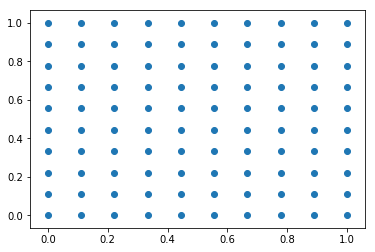

In [6]:
### plot to see x,y distribution ###
plt.scatter(X[0], X[1])
plt.show()

In [7]:
### get z-values ###
y_labels = f(X, w)

In [8]:
### reshape z values for 3d plot ###
# z_plot = np.full(shape=(m, m), fill_value=0)  # dummy z for 3d plot testing
z_plot = y_labels.reshape((m, m))  # plot real z-values from the halfspace we defined with w

In [9]:
### plot real halfspace ###
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x_plot, y_plot, z_plot, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [10]:
### create noisy labels for our x, y data ###
noise = np.random.randn(y_labels.shape[0]) * 0.2
y_noisy = y_labels + noise

In [11]:
### plot it alond side the real half space ###
ax.scatter(X[0], X[1], y_noisy, c='blue')

In [12]:
### estmiate w based on the noisy data we created ###
w_hat = estimate_half_space(X, y_noisy)
y_hat = f(X, w_hat)
mse = mean_squared_error(y_labels, y_hat)

ax.scatter(X[0], X[1], y_hat, c='red')

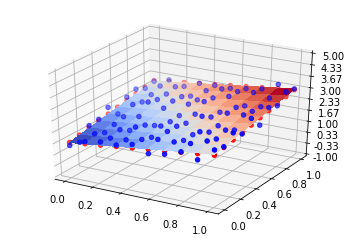

In [13]:
### set 3d plot defs and plot the true and estimated labels ###
margin = 2.0
min_z = min(np.min(y_hat), np.min(y_labels))
max_z = max(np.max(y_hat), np.max(y_labels))

ax.set_zlim(min_z - margin, max_z + margin)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()